In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
all_2016 = pd.read_csv('data/all_2016.csv')
all_2017 = pd.read_csv('data/all_2017.csv')
all_2018 = pd.read_csv('data/all_2018.csv')

In [70]:
all_2016 = all_2016.dropna()
all_2018 = all_2018.dropna()
all_2017 = all_2017.dropna()

In [71]:
all_2016 = all_2016.rename(columns={' Player Salary in $ ': 'salary'})

In [72]:
all_2017.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'salary'],
      dtype='object')

In [45]:
all_seasons = pd.concat([all_2016, all_2017]).reset_index()

In [46]:
all_seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         767 non-null    int64  
 1   Unnamed: 0    767 non-null    int64  
 2   Unnamed: 0.1  767 non-null    int64  
 3   Year          767 non-null    float64
 4   Player        767 non-null    object 
 5   Pos           767 non-null    object 
 6   Age           767 non-null    float64
 7   Tm            767 non-null    object 
 8   G             767 non-null    float64
 9   MP            767 non-null    float64
 10  PER           767 non-null    float64
 11  TS%           767 non-null    float64
 12  3PAr          767 non-null    float64
 13  FTr           767 non-null    float64
 14  ORB%          767 non-null    float64
 15  DRB%          767 non-null    float64
 16  TRB%          767 non-null    float64
 17  AST%          767 non-null    float64
 18  STL%          767 non-null    

In [47]:
all_seasons.tail()

,index,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary
762,481,481,24192,2017.0,Wilson Chandler,SF,29.0,DEN,71.0,2197.0,14.9,0.545,0.347,0.207,5.2,17.7,11.5,9.8,1.2,1.1,10.0,22.0,2.4,1.1,3.6,0.078,0.5,-1.3,-0.8,0.7,433.0,939.0,0.461,110.0,326.0,0.337,323.0,613.0,0.527,0.520,141.0,194.0,0.727,103.0,356.0,459.0,141.0,52.0,30.0,114.0,172.0,1117.0,"$12,016,854"
763,482,482,24259,2017.0,Yogi Ferrell,PG,23.0,TOT,46.0,1197.0,13.1,0.533,0.447,0.226,1.8,9.2,5.3,23.2,1.8,0.7,13.9,19.6,0.8,1.0,1.8,0.072,-0.1,-0.7,-0.7,0.4,160.0,394.0,0.406,68.0,176.0,0.386,92.0,218.0,0.422,0.492,74.0,89.0,0.831,20.0,91.0,111.0,172.0,42.0,9.0,70.0,90.0,462.0,"$1,312,611"
764,483,483,24408,2017.0,Zach LaVine,SG,21.0,MIN,47.0,1749.0,14.6,0.576,0.437,0.197,1.2,9.5,5.3,12.6,1.2,0.5,9.9,21.7,2.5,0.4,3.0,0.082,2.1,-2.4,-0.3,0.8,326.0,710.0,0.459,120.0,310.0,0.387,206.0,400.0,0.515,0.544,117.0,140.0,0.836,18.0,141.0,159.0,139.0,41.0,10.0,85.0,104.0,889.0,"$3,202,217"
765,484,484,24550,2017.0,Zach Randolph,PF,35.0,MEM,73.0,1786.0,18.5,0.490,0.098,0.200,11.3,27.4,19.1,13.5,1.1,0.5,8.6,29.2,0.8,2.4,3.2,0.086,-1.4,-0.7,-2.1,0.0,433.0,964.0,0.449,21.0,94.0,0.223,412.0,870.0,0.474,0.460,141.0,193.0,0.731,182.0,416.0,598.0,122.0,38.0,10.0,99.0,136.0,1028.0,"$12,307,692"
766,485,485,24515,2017.0,Zaza Pachulia,C,32.0,GSW,70.0,1268.0,16.1,0.588,0.007,0.410,12.9,22.0,17.7,13.6,2.2,2.0,19.5,15.3,2.2,2.5,4.7,0.177,-0.3,3.0,2.7,1.5,164.0,307.0,0.534,0.0,2.0,0.000,164.0,305.0,0.538,0.534,98.0,126.0,0.778,140.0,270.0,410.0,132.0,59.0,33.0,88.0,166.0,426.0,"$3,477,600"


In [48]:
all_seasons['salary'] = all_seasons['salary'].str.replace(' ', '')
all_seasons['salary'] = all_seasons['salary'].str.replace('$', '')
all_seasons['salary'] = all_seasons['salary'].str.replace(',', '')
all_seasons['salary'] = pd.to_numeric(all_seasons['salary'])

In [49]:
all_seasons.drop(columns=['index', 'Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [73]:
all_2018['salary'] = all_2018['salary'].str.replace(' ', '')
all_2018['salary'] = all_2018['salary'].str.replace('$', '')
all_2018['salary'] = all_2018['salary'].str.replace(',', '')
all_2018['salary'] = pd.to_numeric(all_seasons['salary'])
all_2018.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [74]:
all_2018

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary
1,2018.0,Aaron Gordon,PF,22.0,ORL,58.0,1909.0,16.5,0.530,0.395,0.260,5.0,21.5,13.2,11.7,1.5,1.9,10.0,24.7,0.9,2.0,2.9,0.072,0.0,0.0,0.0,1.0,375.0,865.0,0.434,115.0,342.0,0.336,260.0,523.0,0.497,0.500,157.0,225.0,0.698,87.0,370.0,457.0,136.0,59.0,45.0,107.0,111.0,1022.0,4351320
4,2018.0,Abdel Nader,SF,24.0,BOS,48.0,522.0,5.1,0.439,0.436,0.262,2.8,12.0,7.4,7.1,1.4,1.6,17.0,17.1,-0.9,0.8,-0.1,-0.014,-5.9,0.3,-5.6,-0.5,50.0,149.0,0.336,23.0,65.0,0.354,27.0,84.0,0.321,0.413,23.0,39.0,0.590,13.0,58.0,71.0,26.0,15.0,10.0,34.0,45.0,146.0,26540100
6,2018.0,Al Horford,C,31.0,BOS,72.0,2277.0,17.6,0.575,0.300,0.159,5.0,20.2,12.7,23.6,0.9,2.9,14.1,18.4,4.0,3.8,7.8,0.165,1.1,2.9,4.0,3.5,368.0,753.0,0.489,97.0,226.0,0.429,271.0,527.0,0.514,0.553,94.0,120.0,0.783,103.0,427.0,530.0,339.0,43.0,78.0,132.0,138.0,927.0,7680965
7,2018.0,Al Jefferson,C,33.0,IND,36.0,484.0,20.2,0.563,0.014,0.173,7.0,26.2,16.7,10.0,1.7,4.2,8.6,22.5,0.8,0.8,1.6,0.158,-1.7,1.3,-0.5,0.2,111.0,208.0,0.534,0.0,3.0,0.000,111.0,205.0,0.541,0.534,30.0,36.0,0.833,30.0,113.0,143.0,30.0,16.0,23.0,21.0,66.0,252.0,1315448
8,2018.0,Al-Farouq Aminu,PF,27.0,POR,69.0,2072.0,12.0,0.522,0.582,0.137,5.2,22.3,13.8,5.8,1.9,1.6,11.3,14.8,0.9,3.2,4.2,0.097,-0.8,1.9,1.1,1.6,230.0,582.0,0.395,125.0,339.0,0.369,105.0,243.0,0.432,0.503,59.0,80.0,0.738,97.0,428.0,525.0,84.0,79.0,40.0,79.0,136.0,644.0,874636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2018.0,Zach Collins,C,20.0,POR,66.0,1045.0,7.5,0.475,0.391,0.145,4.7,18.2,11.5,7.1,0.8,2.4,15.9,15.4,-0.7,1.3,0.6,0.030,-4.1,0.9,-3.2,-0.3,115.0,289.0,0.398,35.0,113.0,0.310,80.0,176.0,0.455,0.458,27.0,42.0,0.643,45.0,176.0,221.0,52.0,17.0,31.0,58.0,133.0,292.0,28299399
536,2018.0,Zach LaVine,SG,22.0,CHI,24.0,656.0,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.3,0.025,-0.6,-2.0,-2.7,-0.1,136.0,355.0,0.383,42.0,123.0,0.341,94.0,232.0,0.405,0.442,87.0,107.0,0.813,9.0,85.0,94.0,72.0,24.0,4.0,43.0,55.0,401.0,13734000
537,2018.0,Zach Randolph,PF,36.0,SAC,59.0,1508.0,17.3,0.529,0.193,0.140,7.0,23.7,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.2,1.5,0.048,-0.6,-1.2,-1.8,0.1,361.0,763.0,0.473,51.0,147.0,0.347,310.0,616.0,0.503,0.507,84.0,107.0,0.785,97.0,300.0,397.0,127.0,42.0,10.0,116.0,119.0,857.0,77250
538,2018.0,Zaza Pachulia,C,33.0,GSW,69.0,972.0,17.0,0.612,0.004,0.352,11.0,25.0,18.5,15.2,1.9,1.4,19.1,17.0,1.8,1.4,3.3,0.161,-0.5,1.3,0.8,0.7,149.0,264.0,0.564,0.0,1.0,0.000,149.0,263.0,0.567,0.564,75.0,93.0,0.806,89.0,232.0,321.0,109.0,38.0,17.0,72.0,122.0,373.0,10000000


In [50]:
all_seasons.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary
0,2016.0,Aaron Brooks,PG,31.0,CHI,69.0,1108.0,11.8,0.494,0.394,0.136,2.0,7.5,4.8,26.0,1.4,0.7,14.2,22.9,0.2,0.7,0.9,0.040,-0.5,-2.8,-3.3,-0.4,188.0,469.0,0.401,66.0,185.0,0.357,122.0,284.0,0.430,0.471,49.0,64.0,0.766,21.0,80.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0,2700000
1,2016.0,Aaron Gordon,PF,20.0,ORL,78.0,1863.0,17.0,0.541,0.245,0.333,9.0,21.3,15.1,10.3,1.6,2.4,9.0,17.3,3.2,2.2,5.4,0.139,0.6,1.2,1.8,1.8,274.0,579.0,0.473,42.0,142.0,0.296,232.0,437.0,0.531,0.509,129.0,193.0,0.668,154.0,353.0,507.0,128.0,59.0,55.0,66.0,153.0,719.0,4351320
2,2016.0,Aaron Harrison,SG,21.0,CHO,21.0,93.0,4.3,0.371,0.526,0.632,4.7,13.1,8.8,3.0,3.2,0.0,14.1,13.7,-0.2,0.1,0.0,-0.014,-5.6,0.1,-5.5,-0.1,5.0,19.0,0.263,3.0,10.0,0.300,2.0,9.0,0.222,0.342,5.0,12.0,0.417,4.0,11.0,15.0,2.0,6.0,0.0,4.0,10.0,18.0,365289
3,2016.0,Adreian Payne,PF,24.0,MIN,52.0,486.0,5.6,0.422,0.221,0.179,4.8,21.5,13.3,8.9,1.7,1.8,18.7,17.7,-0.9,0.4,-0.5,-0.047,-5.9,-0.2,-6.1,-0.5,53.0,145.0,0.366,9.0,32.0,0.281,44.0,113.0,0.389,0.397,17.0,26.0,0.654,20.0,91.0,111.0,29.0,16.0,11.0,36.0,77.0,132.0,2022240
4,2016.0,Al Horford,C,29.0,ATL,82.0,2631.0,19.4,0.565,0.244,0.123,6.3,18.2,12.4,16.7,1.3,3.6,8.8,20.6,4.9,4.5,9.4,0.172,1.5,2.6,4.1,4.1,529.0,1048.0,0.505,88.0,256.0,0.344,441.0,792.0,0.557,0.547,103.0,129.0,0.798,148.0,448.0,596.0,263.0,68.0,121.0,107.0,163.0,1249.0,26540100


In [51]:
def get_x_y(df):
    y = df['salary']
    X = df.drop(columns=['Age', 'Year', 'Player', 'salary', 'Pos', 'Tm'])
    return X, y

In [52]:
X,y = get_x_y(all_seasons)

In [55]:
columns = X.columns
columns

Index(['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

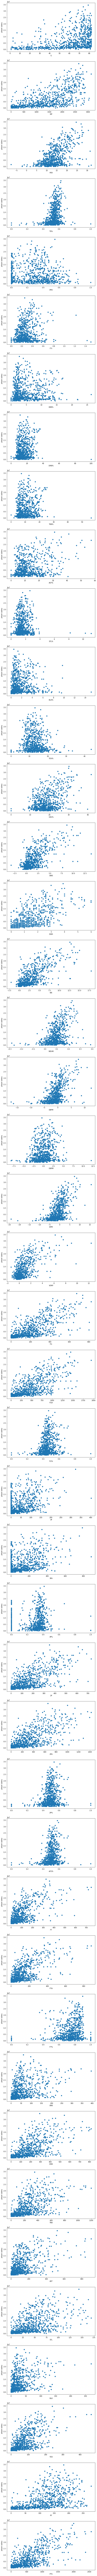

In [54]:
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [56]:
filtered_df = all_seasons[all_seasons['MP']>200]

In [58]:
fil_X,fil_y = get_x_y(filtered_df)

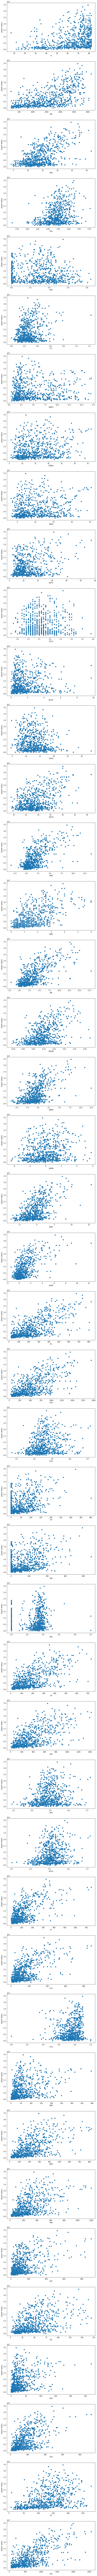

In [59]:
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(fil_X[col], fil_y)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [64]:
X_train, X_test, y_train, y_test = tts(fil_X,fil_y)
rf = RandomForestRegressor()
rf.fit(fil_X,fil_y)
#rf.score(X_test,y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
X_2018, y_2018 = get_x_y(all_2018)

In [76]:
rf_predict = rf.predict(X_2018)

In [77]:
all_2018['rf_predict'] = rf_predict
all_2018['rf_predict-actual'] = all_2018['rf_predict'] - all_2018['salary']
all_2018

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary,rf_predict,rf_predict-actual
1,2018.0,Aaron Gordon,PF,22.0,ORL,58.0,1909.0,16.5,0.530,0.395,0.260,5.0,21.5,13.2,11.7,1.5,1.9,10.0,24.7,0.9,2.0,2.9,0.072,0.0,0.0,0.0,1.0,375.0,865.0,0.434,115.0,342.0,0.336,260.0,523.0,0.497,0.500,157.0,225.0,0.698,87.0,370.0,457.0,136.0,59.0,45.0,107.0,111.0,1022.0,4351320,10814019.56,6462699.56
4,2018.0,Abdel Nader,SF,24.0,BOS,48.0,522.0,5.1,0.439,0.436,0.262,2.8,12.0,7.4,7.1,1.4,1.6,17.0,17.1,-0.9,0.8,-0.1,-0.014,-5.9,0.3,-5.6,-0.5,50.0,149.0,0.336,23.0,65.0,0.354,27.0,84.0,0.321,0.413,23.0,39.0,0.590,13.0,58.0,71.0,26.0,15.0,10.0,34.0,45.0,146.0,26540100,3064335.45,-23475764.55
6,2018.0,Al Horford,C,31.0,BOS,72.0,2277.0,17.6,0.575,0.300,0.159,5.0,20.2,12.7,23.6,0.9,2.9,14.1,18.4,4.0,3.8,7.8,0.165,1.1,2.9,4.0,3.5,368.0,753.0,0.489,97.0,226.0,0.429,271.0,527.0,0.514,0.553,94.0,120.0,0.783,103.0,427.0,530.0,339.0,43.0,78.0,132.0,138.0,927.0,7680965,16924960.12,9243995.12
7,2018.0,Al Jefferson,C,33.0,IND,36.0,484.0,20.2,0.563,0.014,0.173,7.0,26.2,16.7,10.0,1.7,4.2,8.6,22.5,0.8,0.8,1.6,0.158,-1.7,1.3,-0.5,0.2,111.0,208.0,0.534,0.0,3.0,0.000,111.0,205.0,0.541,0.534,30.0,36.0,0.833,30.0,113.0,143.0,30.0,16.0,23.0,21.0,66.0,252.0,1315448,3819904.76,2504456.76
8,2018.0,Al-Farouq Aminu,PF,27.0,POR,69.0,2072.0,12.0,0.522,0.582,0.137,5.2,22.3,13.8,5.8,1.9,1.6,11.3,14.8,0.9,3.2,4.2,0.097,-0.8,1.9,1.1,1.6,230.0,582.0,0.395,125.0,339.0,0.369,105.0,243.0,0.432,0.503,59.0,80.0,0.738,97.0,428.0,525.0,84.0,79.0,40.0,79.0,136.0,644.0,874636,8603457.32,7728821.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2018.0,Zach Collins,C,20.0,POR,66.0,1045.0,7.5,0.475,0.391,0.145,4.7,18.2,11.5,7.1,0.8,2.4,15.9,15.4,-0.7,1.3,0.6,0.030,-4.1,0.9,-3.2,-0.3,115.0,289.0,0.398,35.0,113.0,0.310,80.0,176.0,0.455,0.458,27.0,42.0,0.643,45.0,176.0,221.0,52.0,17.0,31.0,58.0,133.0,292.0,28299399,3783257.94,-24516141.06
536,2018.0,Zach LaVine,SG,22.0,CHI,24.0,656.0,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.3,0.025,-0.6,-2.0,-2.7,-0.1,136.0,355.0,0.383,42.0,123.0,0.341,94.0,232.0,0.405,0.442,87.0,107.0,0.813,9.0,85.0,94.0,72.0,24.0,4.0,43.0,55.0,401.0,13734000,5395657.71,-8338342.29
537,2018.0,Zach Randolph,PF,36.0,SAC,59.0,1508.0,17.3,0.529,0.193,0.140,7.0,23.7,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.2,1.5,0.048,-0.6,-1.2,-1.8,0.1,361.0,763.0,0.473,51.0,147.0,0.347,310.0,616.0,0.503,0.507,84.0,107.0,0.785,97.0,300.0,397.0,127.0,42.0,10.0,116.0,119.0,857.0,77250,9719478.09,9642228.09
538,2018.0,Zaza Pachulia,C,33.0,GSW,69.0,972.0,17.0,0.612,0.004,0.352,11.0,25.0,18.5,15.2,1.9,1.4,19.1,17.0,1.8,1.4,3.3,0.161,-0.5,1.3,0.8,0.7,149.0,264.0,0.564,0.0,1.0,0.000,149.0,263.0,0.567,0.564,75.0,93.0,0.806,89.0,232.0,321.0,109.0,38.0,17.0,72.0,122.0,373.0,10000000,7121094.59,-2878905.41


In [89]:
all_2018[all_2018['salary']<5000000].sort_values('rf_predict', ascending=False).head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary,rf_predict,rf_predict-actual
325,2018.0,LeBron James,PF,33.0,CLE,82.0,3026.0,28.6,0.621,0.257,0.336,3.7,22.3,13.1,44.4,1.9,2.0,16.1,31.6,11.0,3.0,14.0,0.221,7.6,2.0,9.6,8.9,857.0,1580.0,0.542,149.0,406.0,0.367,708.0,1174.0,0.603,0.590,388.0,531.0,0.731,97.0,612.0,709.0,747.0,116.0,71.0,347.0,136.0,2251.0,1350120,26881009.16,25530889.16
218,2018.0,James Harden,SG,28.0,HOU,72.0,2551.0,29.8,0.619,0.498,0.502,1.8,15.2,8.6,45.1,2.4,1.7,15.1,36.1,11.6,3.8,15.4,0.289,9.6,1.3,10.9,8.3,651.0,1449.0,0.449,265.0,722.0,0.367,386.0,727.0,0.531,0.541,624.0,727.0,0.858,41.0,348.0,389.0,630.0,126.0,50.0,315.0,169.0,2191.0,1192080,25244029.30,24051949.30
465,2018.0,Stephen Curry,PG,29.0,GSW,51.0,1631.0,28.2,0.675,0.580,0.350,2.7,14.4,9.0,30.3,2.4,0.4,13.3,31.0,7.2,1.8,9.1,0.267,9.9,-1.3,8.6,4.4,428.0,864.0,0.495,212.0,501.0,0.423,216.0,363.0,0.595,0.618,278.0,302.0,0.921,36.0,225.0,261.0,310.0,80.0,8.0,153.0,114.0,1346.0,1312611,23652035.79,22339424.79
318,2018.0,LaMarcus Aldridge,C,32.0,SAS,75.0,2509.0,25.0,0.570,0.068,0.296,10.8,17.3,14.0,11.3,0.9,3.0,6.8,29.1,7.4,3.5,10.9,0.209,3.0,0.3,3.3,3.3,687.0,1347.0,0.510,27.0,92.0,0.293,660.0,1255.0,0.526,0.520,334.0,399.0,0.837,246.0,389.0,635.0,152.0,43.0,90.0,111.0,161.0,1735.0,1720560,21814447.78,20093887.78
300,2018.0,Kevin Durant,PF,29.0,GSW,68.0,2325.0,26.0,0.640,0.338,0.331,1.6,19.5,11.2,25.5,1.0,4.0,12.9,30.4,7.5,2.9,10.4,0.215,5.0,0.7,5.6,4.5,630.0,1222.0,0.516,173.0,413.0,0.419,457.0,809.0,0.565,0.586,359.0,404.0,0.889,31.0,433.0,464.0,366.0,50.0,119.0,207.0,133.0,1792.0,2255644,21680067.88,19424423.88
